## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [13]:
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

with open('7.10._clustering.pkl', 'rb') as file:
     data = pickle.load(file)
X = data['X']
y = data['Y']

Метрика силуэта при двух кластерах: 0.4465356047465253


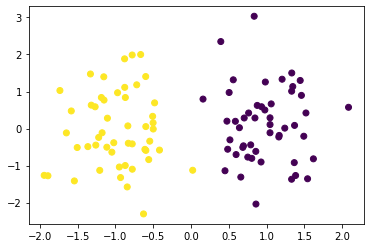

In [14]:
model = KMeans(n_clusters=2).fit(X)
print(f'Метрика силуэта при двух кластерах: {silhouette_score(X, model.labels_)}')
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.show()

Метрика силуэта при четырех кластерах: 0.4433754926522356


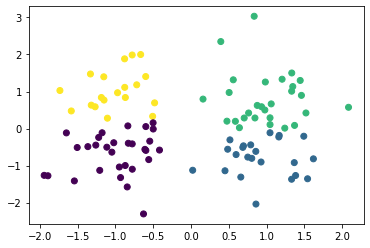

In [15]:
model = KMeans(n_clusters=4).fit(X)
print(f'Метрика силуэта при четырех кластерах: {silhouette_score(X, model.labels_)}')
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.show()

При двух кластерах метрика принимает лучшее значение


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [10]:
from sklearn.metrics import adjusted_mutual_info_score

model = KMeans(n_clusters=2).fit(X)
print(f'AMI при двух кластерах: {adjusted_mutual_info_score(y, model.labels_)}')

model = KMeans(n_clusters=4).fit(X)
print(f'AMI при четырех кластерах: {adjusted_mutual_info_score(y, model.labels_)}')

AMI при двух кластерах: 0.9286022516535728
AMI при четырех кластерах: 0.5827727212133397


По AMI лучшее значение кластеров - 2.


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

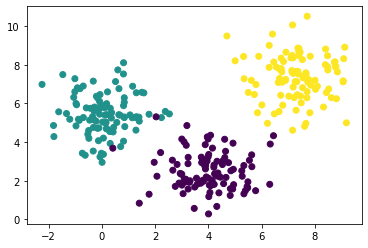

In [23]:
from numpy import genfromtxt
data = genfromtxt('7.10_clustering_hw.csv', delimiter=',', skip_header=True)
X = data[:, :2]
y = data[:, 2]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

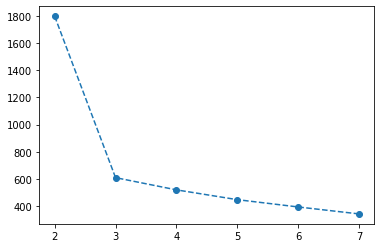

In [41]:
scores = []
for k in range(2, 8):
     model = KMeans(n_clusters=k).fit(X)
     scores.append(model.inertia_)

plt.plot(range(2, 8), scores, linestyle='--', marker='o')
plt.show()

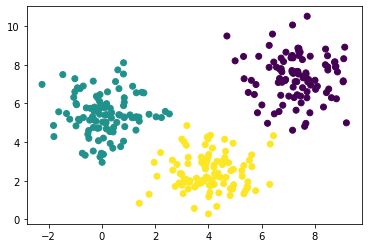

In [46]:
model = KMeans(n_clusters=3)
model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.show()

In [62]:
model.predict([[5, 8], [0, 5]])

array([0, 1])

Точки находятся в разных кластерах. Первая в нулевом кластере, вторая - в первом.

In [64]:
print(f'{adjusted_mutual_info_score(y, model.labels_) = }')

adjusted_mutual_info_score(y, model.labels_) = 0.9700074953683859


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)